***
I tried my best at understanding the data, and perform quit good EDA.

My score is 0.13 in standard Gradient Boosting Regressor without any tuning. So, EDA is matter.
***

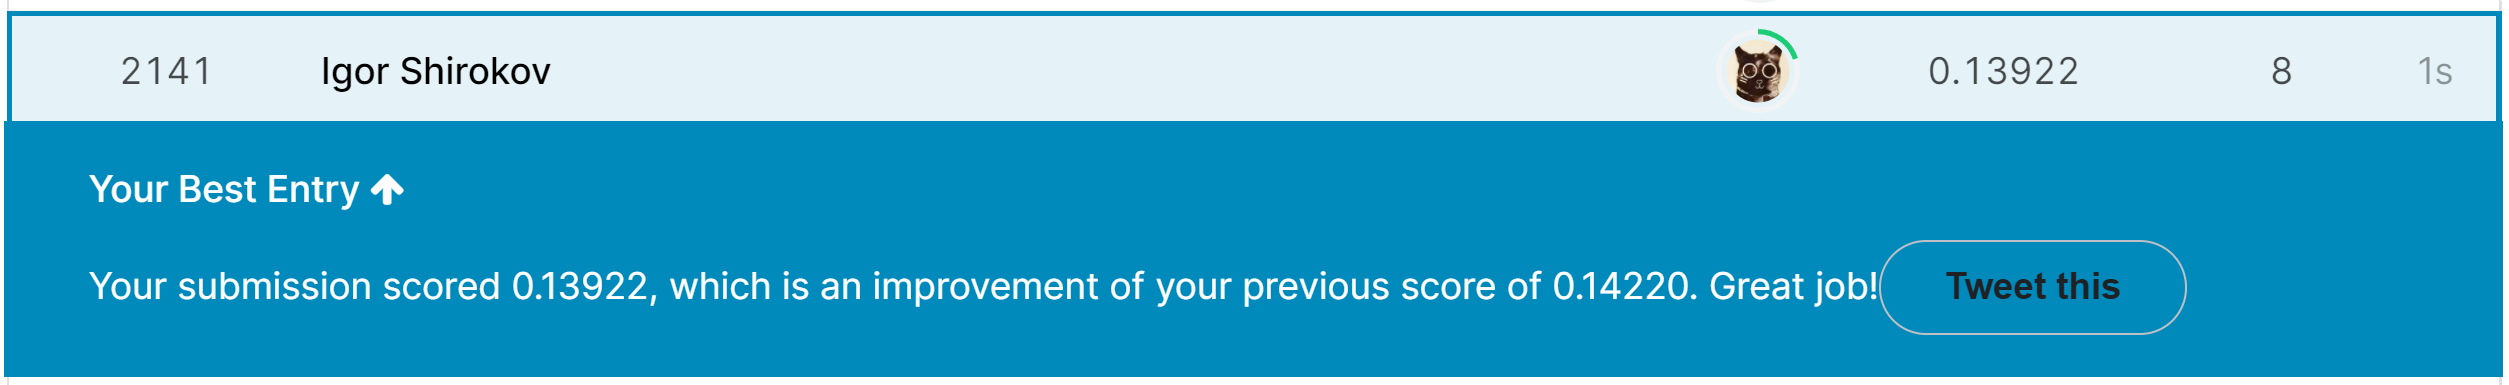

# Import Libraries

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Multiple linear regression model
from sklearn import linear_model
# Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
# Principal component analysis
from sklearn.decomposition import PCA
# Different distributions
from scipy.stats import zscore, norm, lognorm, johnsonsu

# Import Data Sets

In [2]:
# Setting this option will print all collumns of a dataframe and all of the data in a feature
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# load train df
train = pd.read_csv('train.csv')
# Drop the  'Id' colum since it's unnecessary for the prediction process
train.drop(['Id'], axis=1, inplace=True)

In [4]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Preprocessing

# Exploratory Data Analysis

In [5]:
# Some NaN have explanation in the File description. Let's define them
def replace_func_1(df):
    return df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                 50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                 80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                 150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "Alley" : {np.nan : "No alley access"},
                       "BsmtQual" : {np.nan : "No Basement"},
                       "BsmtCond" : {np.nan : "No Basement"},
                       "BsmtFinType1" : {np.nan : "No Basement"},
                       "BsmtFinType2" : {np.nan : "No Basement"},
                       "BsmtExposure" : {np.nan : "No Basement"},
                       "FireplaceQu" : {np.nan : "No Fireplace"},
                       "GarageType" : {np.nan : "No Garage"},
                       "GarageYrBlt" : {np.nan : "No Garage"},
                       "GarageFinish" : {np.nan : "No Garage"},
                       "GarageQual" : {np.nan : "No Garage"},
                       "GarageCond" : {np.nan : "No Garage"},
                       "PoolQC" : {np.nan : "No Pool"},
                       "Fence" : {np.nan : "No Fence"},
                       "MiscFeature" : {np.nan : "None"},
    })

train = replace_func_1(train)

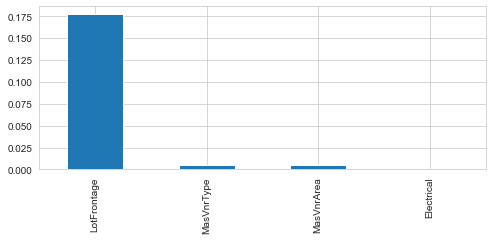

In [6]:
# Show NaN as % of missing values in the column
plt.figure(figsize=(8,3))
sns.set_style("whitegrid")
is_null_list = train.isnull().sum() / len(train)
is_null_list.sort_values(ascending=False, inplace=True)
is_null_list[is_null_list > 0].plot.bar()
plt.show()

In [7]:
train.groupby('MasVnrType', dropna=False).median()['MasVnrArea']

MasVnrType
BrkCmn     192.0
BrkFace    202.0
None         0.0
Stone      206.5
NaN          NaN
Name: MasVnrArea, dtype: float64

In [8]:
# Find how OverallQual corr OverallQual
LotFrontage_median = train.groupby('OverallQual').median()['LotFrontage']
LotFrontage_median

OverallQual
1      50.0
2      51.0
3      60.0
4      60.0
5      67.0
6      69.0
7      68.0
8      79.5
9      85.5
10    103.0
Name: LotFrontage, dtype: float64

In [9]:
train.groupby('Electrical', dropna=False).median()['SalePrice']

Electrical
FuseA    121250.0
FuseF    115000.0
FuseP     82000.0
Mix       67000.0
SBrkr    170000.0
NaN      167500.0
Name: SalePrice, dtype: float64

In [10]:
bins = np.linspace(min(train['SalePrice']), max(train['SalePrice']), 10)
train.groupby([pd.cut(train.SalePrice, bins),'Electrical']).median()['OverallQual']

SalePrice                 Electrical
(34900.0, 114911.111]     FuseA          5.0
                          FuseF          4.0
                          FuseP          4.5
                          Mix            5.0
                          SBrkr          5.0
(114911.111, 194922.222]  FuseA          5.0
                          FuseF          6.0
                          FuseP          6.0
                          Mix            NaN
                          SBrkr          6.0
(194922.222, 274933.333]  FuseA          6.0
                          FuseF          NaN
                          FuseP          NaN
                          Mix            NaN
                          SBrkr          7.0
(274933.333, 354944.444]  FuseA          NaN
                          FuseF          NaN
                          FuseP          NaN
                          Mix            NaN
                          SBrkr          8.0
(354944.444, 434955.556]  FuseA          NaN
                  

In [11]:
# Fill other NaN
def replace_func_2(df):
    df = df.replace({"MasVnrType" : {np.nan : "None"},
                "MasVnrArea" : {np.nan : 0},
                "Electrical" : {np.nan : "SBrkr"}
               })
    for index, row in df.iterrows():
        if np.isnan(row['LotFrontage']):
            df.loc[index, 'LotFrontage'] = LotFrontage_median.iat[row['OverallQual'] - 1]
    return df

train = replace_func_2(train)

In [12]:
# Check NaN
train.isna().sum().sum()

0

In [13]:
# Combine Y and M
date_sold = train[["YrSold","MoSold"]].copy()
date_sold.columns=['year','month']
date_sold['day']=1
train['DATE'] = pd.to_datetime(date_sold)
train = train.drop(["YrSold","MoSold"], axis=1)
del date_sold

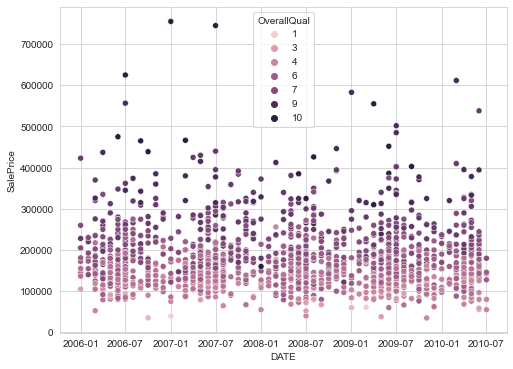

In [14]:
# Plot DATE
plt.figure(figsize=(8,6))
sns.scatterplot(y=train['SalePrice'], x=train['DATE'], hue=train['OverallQual'])
plt.show()

## We group manually features that are related to each other

---

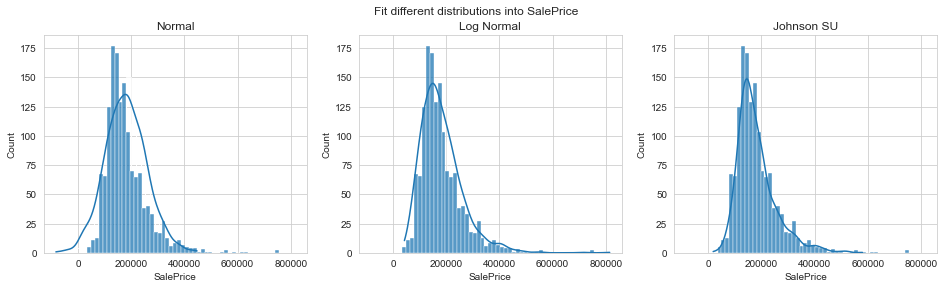

In [15]:
# FutureWarning: `distplot` is a deprecated function and will be removed in a future version.
# That's why let's use histplot without fit method
r_size=1500
y = train['SalePrice']
fig, axes = plt.subplots(1, 3, figsize=(16,4), sharex=True)
fig.suptitle('Fit different distributions into SalePrice')

# Normal
loc1, scale1 = norm.fit(y)
r1 = norm.rvs(loc1, scale1, size=r_size)
sns.histplot(data=r1, kde='True', ax=axes[0], alpha = 0)
sns.histplot(data=y, ax=axes[0])
axes[0].set_title('Normal')

# Log Normal
s1, loc2, scale2 = lognorm.fit(y)
r2 = lognorm.rvs(s1, loc2, scale2, size=r_size)
sns.histplot(data=r2, kde='True', ax=axes[1], alpha = 0)
sns.histplot(data=y, ax=axes[1])
axes[1].set_title('Log Normal')

# Johnson SU
a1, b1, loc3, scale3 = johnsonsu.fit(y)
r3 = johnsonsu.rvs(a1, b1, loc3, scale3, size=r_size)
sns.histplot(data=r3, kde='True', ax=axes[2], alpha = 0)
sns.histplot(data=y, ax=axes[2])
axes[2].set_title('Johnson SU')

plt.show()

In [16]:
# We use the numpy fuction log1p which applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

In [17]:
# Devide data to quantitative and qualitative
quantitative = list(train.describe(include=np.number).columns)
qualitative = list(train.describe(include=np.object_).columns)
# To discrete and continuous
quant_discrete = []
quant_continuous = []
for quant in quantitative:
    if len(np.unique(train[quant])) <=20:
        quant_discrete.append(quant)
    else:
        quant_continuous.append(quant)

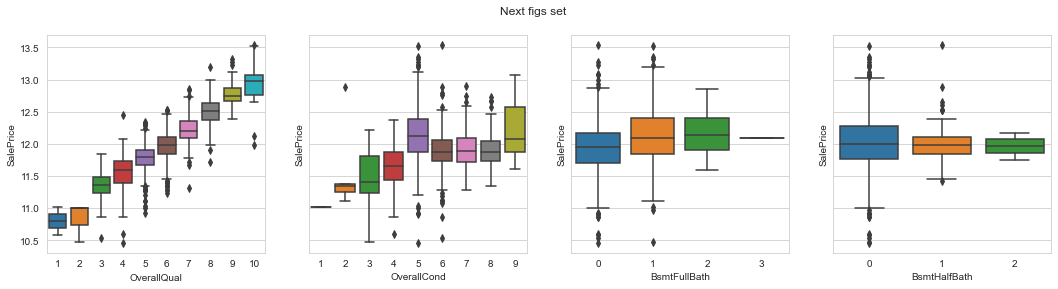

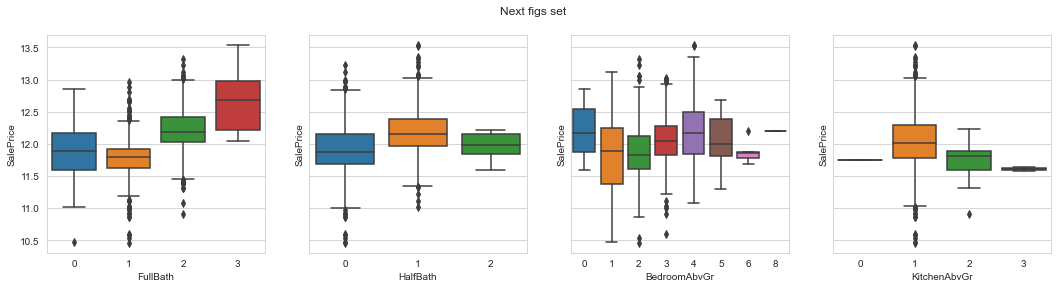

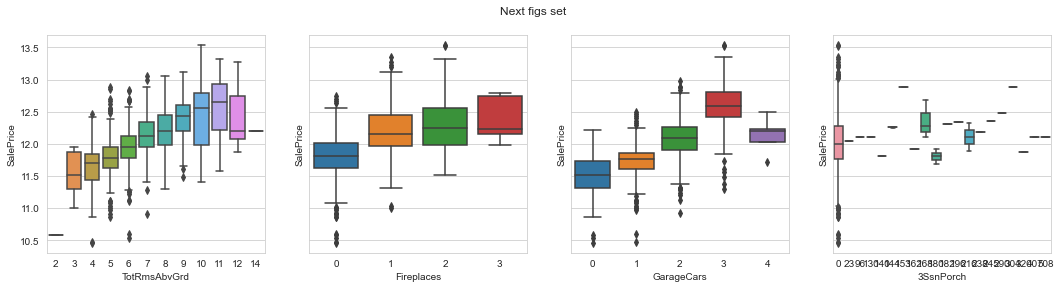

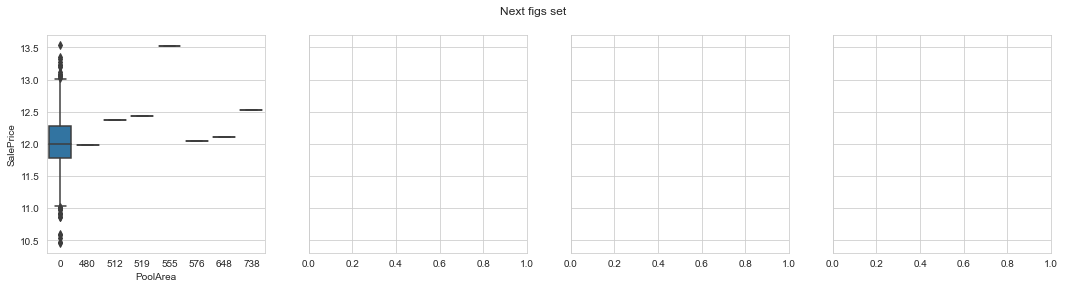

In [18]:
# Plot discret
i=0
while i < len(quant_discrete):
    fig, axes = plt.subplots(1, 4, figsize=(18,4), sharey=True)
    fig.suptitle('Next figs set')
    k=0
    for j in range(i,i+4):
        if j >= len(quant_discrete):
            break
        else:
            sns.boxplot(data=train, y='SalePrice', x=quant_discrete[j], ax=axes[k])
        k+=1
    i+=4
    plt.show()

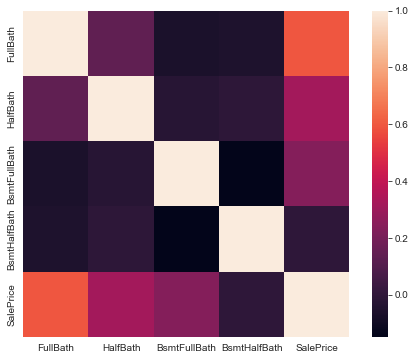

In [19]:
# See how SalePrice correlated with different batches
plt.figure(figsize=(8,6))
corr_table = train[['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'SalePrice']].corr()
sns.heatmap(corr_table, square=True)
plt.show()

In [33]:
# Define reg model
def regr_model(banch, x):
    regr = linear_model.LinearRegression()
    regr.fit(x, regr_y)
    return regr

regr_y = np.asanyarray(train['SalePrice'])

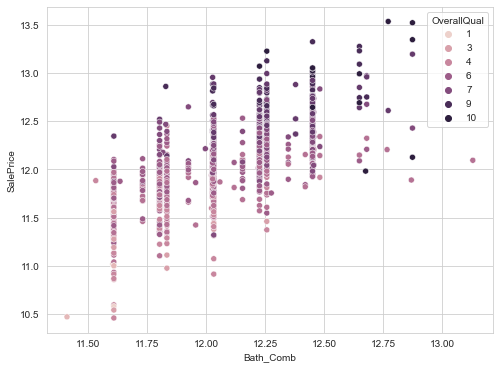

In [34]:
# Create Bath_Comb feature and plot it
banch = ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']
regr_x = np.asanyarray(train[banch])
regr = regr_model(banch, regr_x)
train['Bath_Comb'] = regr.predict(regr_x)

# Plot Bath_Comb
plt.figure(figsize=(8,6))
sns.scatterplot(y=train['SalePrice'], x=train['Bath_Comb'], hue=train['OverallQual'])
plt.show()

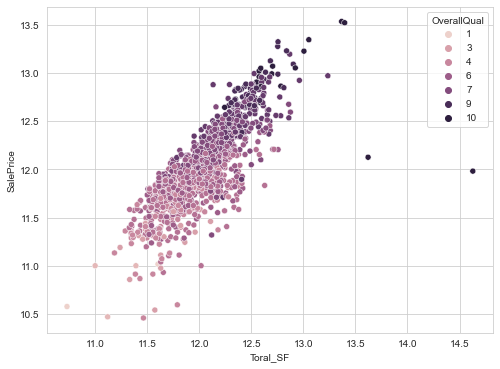

In [35]:
# Create Toral_SF feature and plot it
train["GrLivArea"] = np.log1p(train["GrLivArea"])
train["1stFlrSF"] = np.log1p(train["1stFlrSF"])

banch = ['GrLivArea', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF']
regr_x = np.asanyarray(train[banch])
regr = regr_model(banch, regr_x)
train['Toral_SF'] = regr.predict(regr_x)

# Plot Toral_SF
plt.figure(figsize=(8,6))
sns.scatterplot(y=train['SalePrice'], x=train['Toral_SF'], hue=train['OverallQual'])
plt.show()

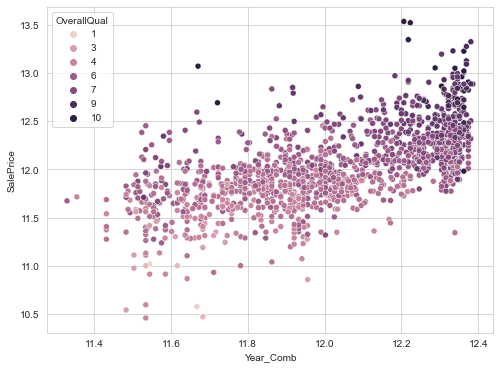

In [36]:
# Create Year_Comb feature and plot it
banch = ['YearBuilt', 'YearRemodAdd']
regr_x = np.asanyarray(train[banch])
regr = regr_model(banch, regr_x)
train['Year_Comb'] = regr.predict(regr_x)

# Plot Bath_Comb
plt.figure(figsize=(8,6))
sns.scatterplot(y=train['SalePrice'], x=train['Year_Comb'], hue=train['OverallQual'])
plt.show()

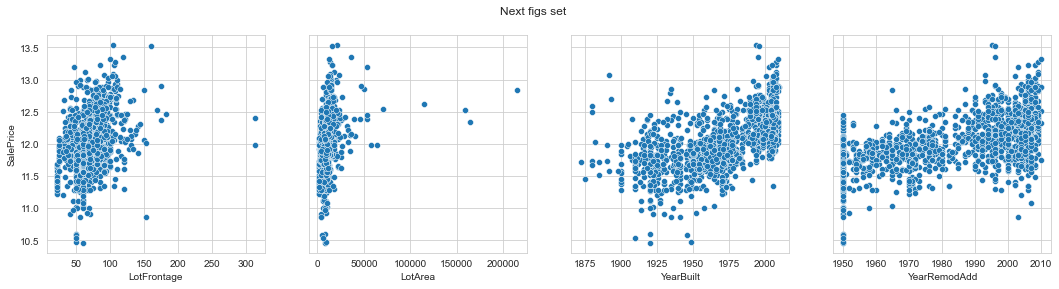

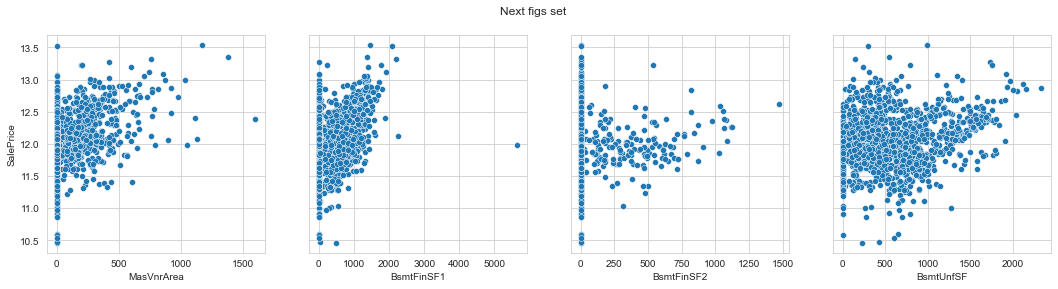

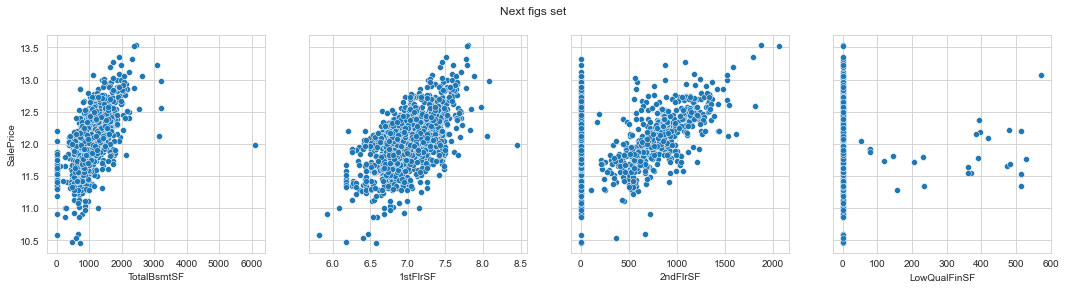

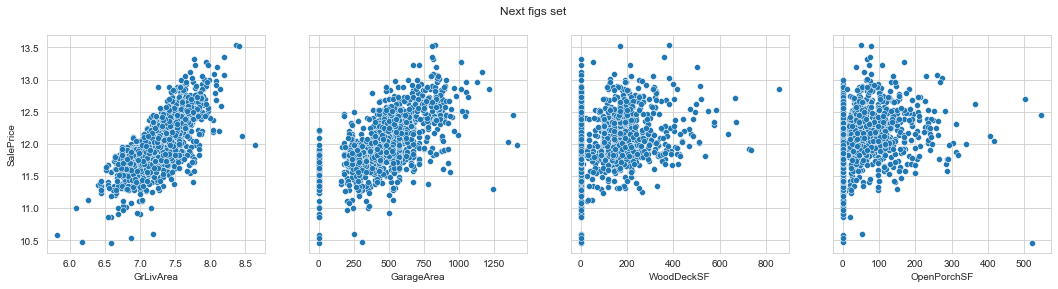

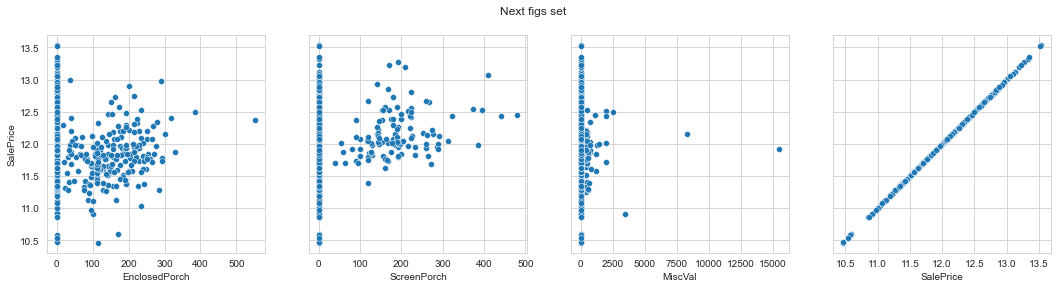

In [24]:
# Plot continuous
i=0
while i < len(quant_continuous):
    fig, axes = plt.subplots(1, 4, figsize=(18,4), sharey=True)
    fig.suptitle('Next figs set')
    k=0
    for j in range(i,i+4):
        if j >= len(quant_continuous):
            break
        else:
            sns.scatterplot(data=train, y='SalePrice', x=quant_continuous[j], ax=axes[k])
        k+=1
    i+=4
    plt.show()

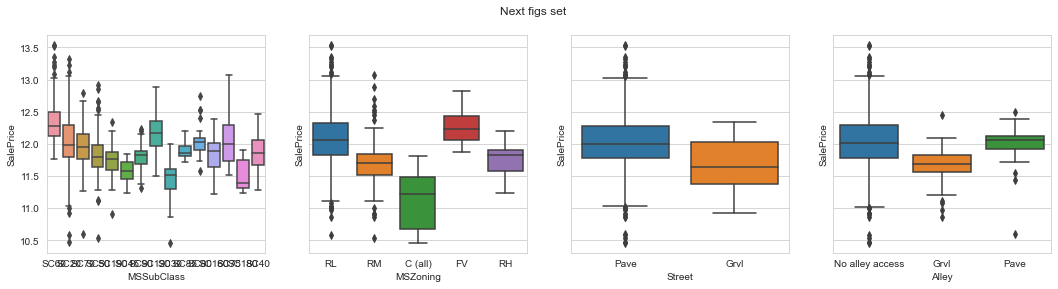

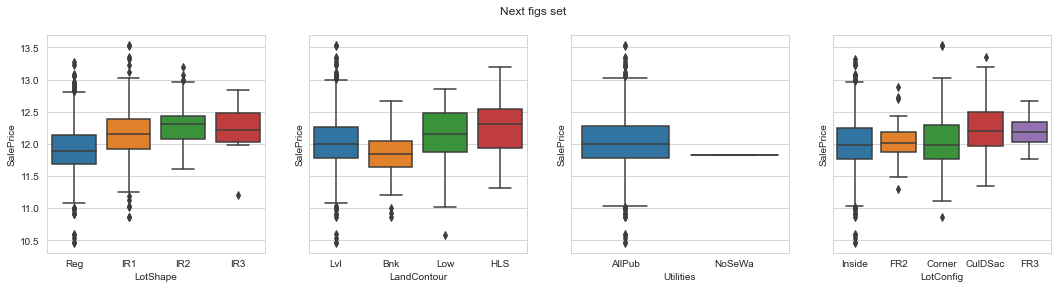

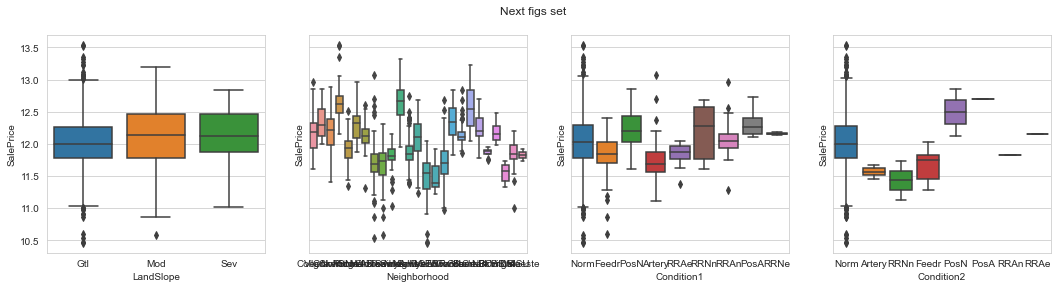

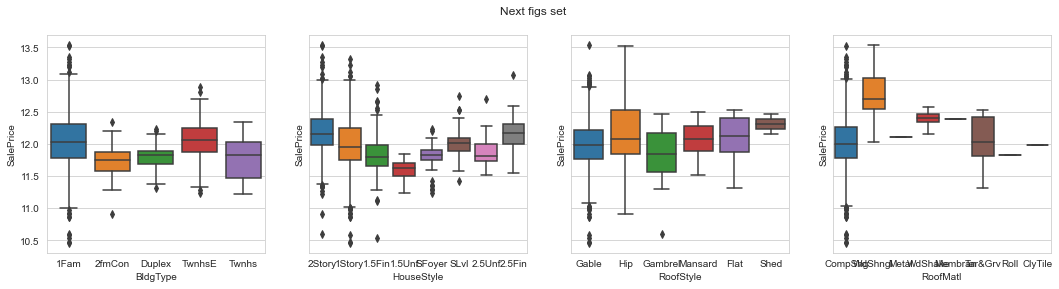

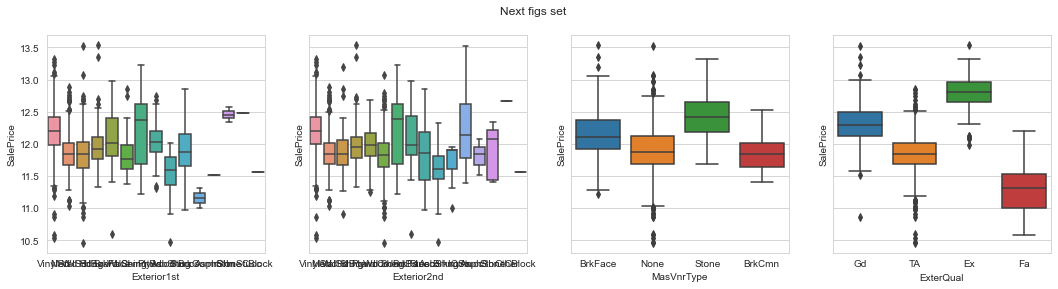

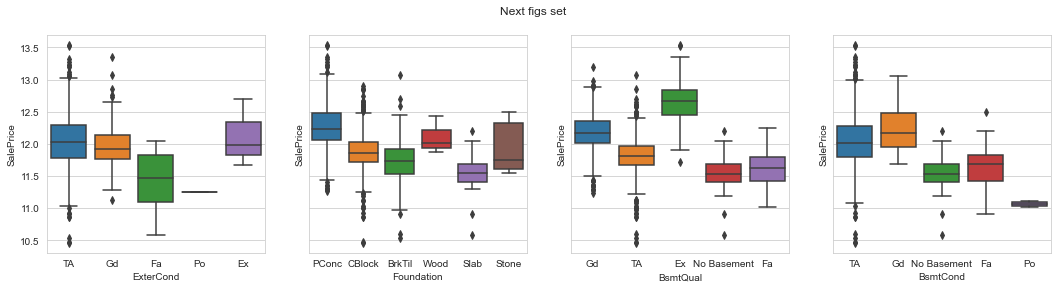

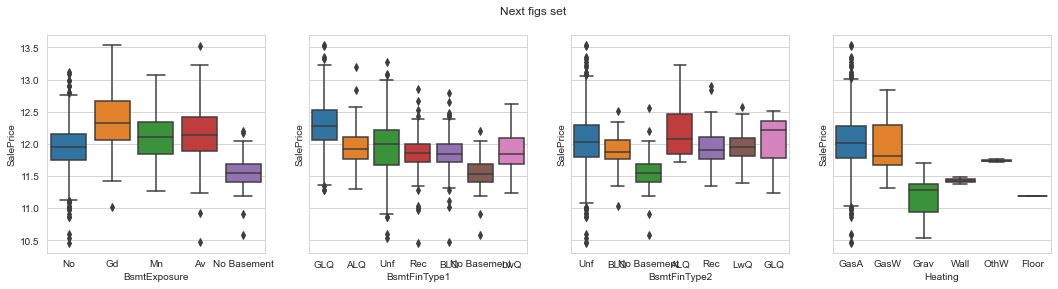

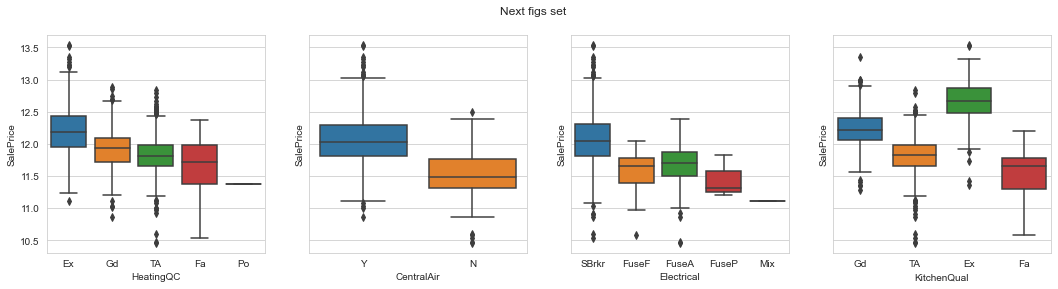

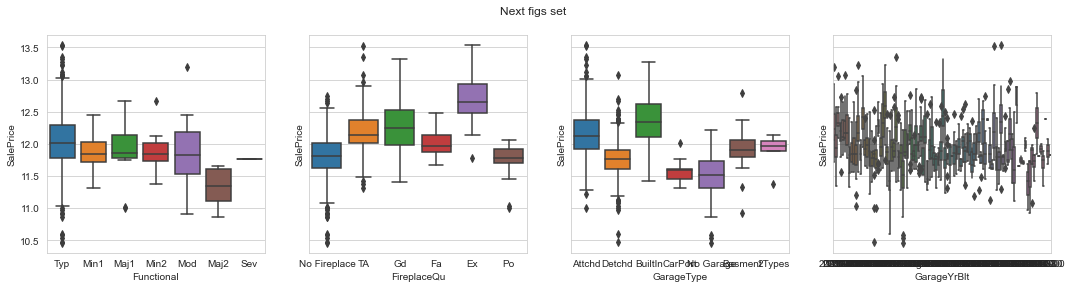

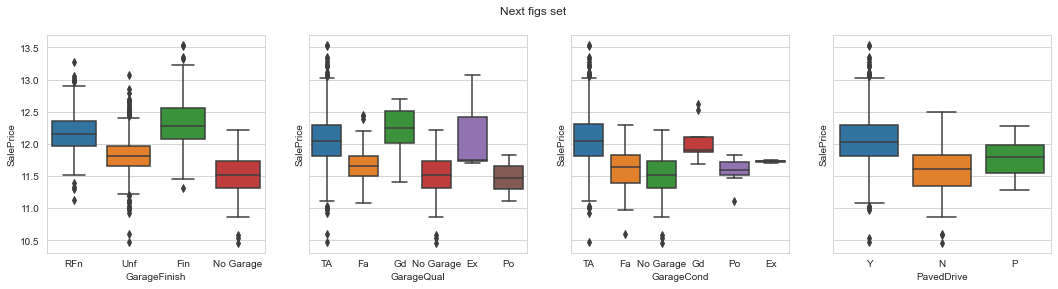

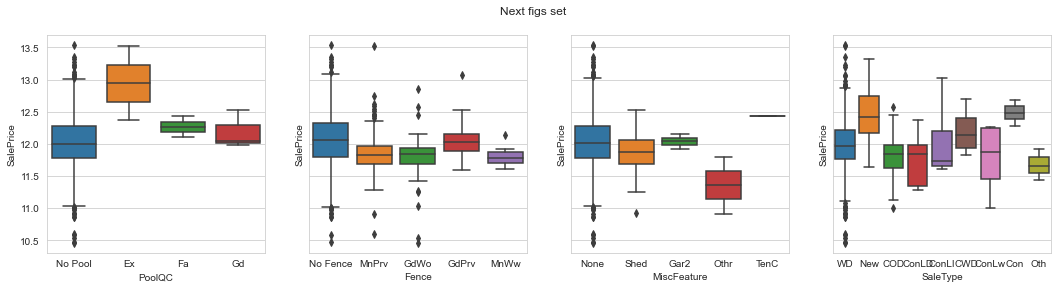

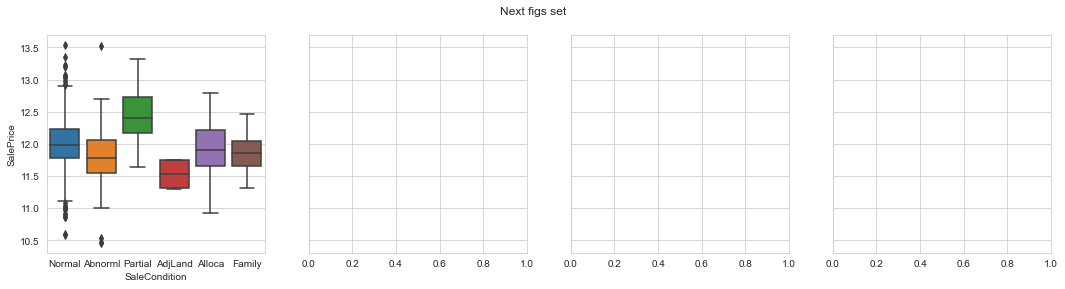

In [25]:
# Plot qualitative
i=0
while i < len(qualitative):
    fig, axes = plt.subplots(1, 4, figsize=(18,4), sharey=True)
    fig.suptitle('Next figs set')
    k=0
    for j in range(i,i+4):
        if j >= len(qualitative):
            break
        else:
            sns.boxplot(data=train, y='SalePrice', x=qualitative[j], ax=axes[k])
        k+=1
    i+=4
    plt.show()

## Сonclusions 1
* 3SsnPorch: drop
* PoolArea: drop
* YrSold: drop
* MoSold: drop


* Fireplaces: >0 or not


* TotRmsAbvGrd: drop >11
* Bath_Comb: drop >12.75
* Toral_SF: drop >13


* 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath': LinearRegression()
* 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF' : LinearRegression()
* 'YearBuilt', 'YearRemodAdd' : LinearRegression()

## Сonclusions 2

* BsmtFinSF1: drop
* BsmtFinSF2: drop
* LowQualFinSF: drop
* WoodDeckSF: drop
* OpenPorchSF: drop
* MiscVal: drop


* LotArea: drop >100000


* EnclosedPorch: >0 or not
* ScreenPorch: >0 or not


* BsmtUnfSF: bins [0, 1000, 1500, 5000]

## Сonclusions 3
* Street: drop
* Utilities: drop
* LotConfig: drop
* LandSlope: drop
* BldgType drop
* RoofStyle: drop
* RoofMatl: drop
* Exterior1st: drop
* Exterior2st: drop
* GarageYrBlt: drop
* Fence: drop
* MiscFeature: drop
* SaleCondition: drop
* BsmtExposure: drop


* MSZoning: Commercial or not
* LotShape: IR2, IR3 (Irregular) or not
* Heating: Grav or not
* SaleType: New or other


* Condition1 + Condition2: PosN or PosA, Artery, Other

In [139]:
def EDA_func(df):
    # Create group_BsmtUnfSF
    bins = [-1, 1000, 1500, 5000]
    labels = [0,1,2]
    df['group_BsmtUnfSF'] = pd.cut(df.BsmtUnfSF, bins=bins, labels=labels).copy()
    
    
    for index, row in df.iterrows():
        
        # Fireplaces
        if row['Fireplaces'] > 0:
            df.loc[index, 'have_Fireplace'] = 1
        else:
            df.loc[index, 'have_Fireplace'] = 0
            
        # EnclosedPorch
        if row['EnclosedPorch'] > 0:
            df.loc[index, 'have_EnclosedPorch'] = 1
        else:
            df.loc[index, 'have_EnclosedPorch'] = 0
            
        # ScreenPorch
        if row['ScreenPorch'] > 0:
            df.loc[index, 'have_ScreenPorch'] = 1
        else:
            df.loc[index, 'have_ScreenPorch'] = 0

        # MSZoning
        if row['MSZoning'] == "C (all)":
            df.loc[index, 'commercial_MSZoning'] = 1
        else:
            df.loc[index, 'commercial_MSZoning'] = 0
            
        # ScreenPorch
        if row['LotShape'] in ['IR2', 'IR3']:
            df.loc[index, 'Irregular_LotShape'] = 1
        else:
            df.loc[index, 'Irregular_LotShape'] = 0

        # Heating
        if row['Heating'] == "Grav":
            df.loc[index, 'Grav_Heating'] = 1
        else:
            df.loc[index, 'Grav_Heating'] = 0
            
        # SaleType
        if row['SaleType'] == "New":
            df.loc[index, 'new_home_SaleType'] = 1
        else:
            df.loc[index, 'new_home_SaleType'] = 0
        
        # Condition1 + Condition2
        if (row['Condition1'] == ("PosN" or "PosA")) | (row['Condition2'] == ("PosN" or "PosA")):
            df.loc[index, 'Condition_comb'] = 2
        elif (row['Condition1'] == "Artery") | (row['Condition2'] == "Artery"):
            df.loc[index, 'Condition_comb'] = 0
        else:
            df.loc[index, 'Condition_comb'] = 1

    return df

# Model Development | Preparations

In [147]:
# load train df
train = pd.read_csv('train.csv')
# load test df
test = pd.read_csv('test.csv')
# Drop the  'Id' colum since it's unnecessary for the prediction process
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

In [148]:
train = replace_func_1(train)
train = replace_func_2(train)
test = replace_func_1(test)
test = replace_func_2(test)

In [149]:
# We use the numpy fuction log1p which applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

In [150]:
# Fill NaN
quantitative = list(test.describe(include=np.number).columns)
qualitative = list(test.describe(include=np.object_).columns)
test[quantitative] = test[quantitative].apply(lambda x: x.fillna(x.median()),axis=0)
test[qualitative] = test[qualitative].apply(lambda x: x.fillna("None"),axis=0)

In [151]:
# Preparations
banch = ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']
train_regr_x = np.asanyarray(train[banch])
test_regr_x = np.asanyarray(test[banch])
regr = regr_model(banch, train_regr_x)
train['Bath_Comb'] = regr.predict(train_regr_x)
test['Bath_Comb'] = regr.predict(test_regr_x)

banch = ['GrLivArea', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF']
train["GrLivArea"] = np.log1p(train["GrLivArea"])
train["1stFlrSF"] = np.log1p(train["1stFlrSF"])
test["GrLivArea"] = np.log1p(test["GrLivArea"])
test["1stFlrSF"] = np.log1p(test["1stFlrSF"])
train_regr_x = np.asanyarray(train[banch])
test_regr_x = np.asanyarray(test[banch])
regr = regr_model(banch, train_regr_x)
train['Toral_SF'] = regr.predict(train_regr_x)
test['Toral_SF'] = regr.predict(test_regr_x)

banch = ['YearBuilt', 'YearRemodAdd']
train_regr_x = np.asanyarray(train[banch])
test_regr_x = np.asanyarray(test[banch])
regr = regr_model(banch, train_regr_x)
train['Year_Comb'] = regr.predict(train_regr_x)
test['Year_Comb'] = regr.predict(test_regr_x)

In [152]:
train = EDA_func(train)
test = EDA_func(test)

In [153]:
# Check NaN
train.isna().sum().sum() + test.isna().sum().sum()

0

In [154]:
# Define features and target variable
y = train.SalePrice.reset_index(drop=True)
train_features = train.drop('SalePrice', axis=1)
test_features = test
features = train_features.append(test_features, sort=False)

In [155]:
# Drop lists of features that we don't need
drop_list_1 = ['3SsnPorch', 'PoolArea', 'YrSold', 'MoSold']
drop_list_2 = ['BsmtFinSF1', 'BsmtFinSF2', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF', 'MiscVal']
drop_list_3 = ['Street', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'GarageYrBlt', 'Fence', 'MiscFeature', 'SaleCondition', 'BsmtExposure']
drop_list_4 = ['Fireplaces', 'EnclosedPorch', 'ScreenPorch', 'MSZoning', 'LotShape', 'Heating', 'SaleType', 'BsmtUnfSF', 'Condition1', 'Condition2']
drop_list_5 = ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']

In [156]:
drop_list_full = drop_list_1+drop_list_2+drop_list_3+drop_list_4+drop_list_5

In [157]:
features = features.drop(drop_list_full, axis=1)

In [158]:
test_features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Bath_Comb,Toral_SF,Year_Comb,group_BsmtUnfSF,have_Fireplace,have_EnclosedPorch,have_ScreenPorch,commercial_MSZoning,Irregular_LotShape,Grav_Heating,new_home_SaleType,Condition_comb
0,SC20,RH,80.0,11622,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,6.799056,0,0,6.799056,0.0,0.0,1,0,2,1,TA,5,Typ,0,No Fireplace,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,No Pool,MnPrv,None,0,6,2010,WD,Normal,11.607678,11.660378,11.816331,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,SC20,RL,81.0,14267,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,7.192934,0,0,7.192934,0.0,0.0,1,1,3,1,Gd,6,Typ,0,No Fireplace,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No Pool,No Fence,Gar2,12500,6,2010,WD,Normal,11.801672,12.061675,11.781461,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,SC60,RL,74.0,13830,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,6.834109,701,0,7.396335,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,No Pool,MnPrv,None,0,3,2010,WD,Normal,12.225323,12.056998,12.241270,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,SC60,RL,78.0,9978,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,6.831954,678,0,7.380879,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,No Pool,No Fence,None,0,6,2010,WD,Normal,12.225323,12.045401,12.246393,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,SC120,RL,43.0,5005,Pave,No alley access,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,7.155396,0,0,7.155396,0.0,0.0,2,0,2,1,Gd,5,Typ,0,No Fireplace,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,No Pool,No Fence,None,0,1,2010,WD,Normal,12.031329,12.021433,12.176653,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [159]:
# Get dummies
final_features = pd.get_dummies(features).reset_index(drop=True)
X = final_features.iloc[:len(y), :]
X_sub = final_features.iloc[len(X):, :]

In [160]:
features.shape

(2919, 47)

In [161]:
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)
overfit

['MSSubClass_SC150', 'KitchenQual_None', 'Functional_None']

In [162]:
X = X.drop(overfit, axis=1).copy()
X_sub = X_sub.drop(overfit, axis=1).copy()

In [163]:
X.shape

(1460, 181)

# Model Development | Final Estimation and Prediction

In [164]:
# Standardize the data in X then reassign it to the variable X using the transform
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
# Sclit the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

In [165]:
# RandomForestRegressor Score with defaults parameters
rfc = RandomForestRegressor(random_state=38)
rfc.fit(X_train, y_train).score(X_test, y_test)

0.845705318773401

In [166]:
# GradientBoostingRegressor Score with defaults parameters
reg = GradientBoostingRegressor(random_state=38)
reg.fit(X_train, y_train).score(X_test, y_test)

0.8777994751901722

In [167]:
# Define X 
X_train_final = X
X_test_final = transform.fit_transform(X_sub)

In [168]:
# Prdict SalePrice - the best
reg.fit(X_train_final, y)
test['SalePrice'] = reg.predict(X_test_final)

# Save results

In [169]:
prediction = pd.DataFrame()

index_n = np.linspace(1461, 2919, 1459)
prediction['Id'] = index_n
prediction['Id'] = prediction['Id'].astype('int')
prediction['SalePrice'] = np.expm1(test['SalePrice'])
prediction.head()

,Id,SalePrice
0,1461,135727.995933
1,1462,158745.639123
2,1463,180506.569695
3,1464,188227.384392
4,1465,194848.748859


In [170]:
pd.DataFrame(prediction).to_csv('prediction_10.01.csv', index=False)